In [1]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
# load the data
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
# the target field custcat has 4 possible values: 1- Basic Service, 2 - E-Service, 3 - Plus Service, 4 - Total Service
# let's see how many of each class is in our data set
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

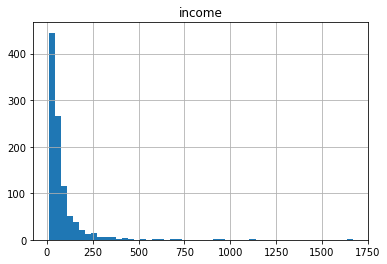

In [4]:
# explore the data using visualisation techniques
df.hist(column='income', bins=50)

In [5]:
# define feature sets
print(df.columns)

# first convert the Pandas data frame to a NumPy array using all columns except custcat
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
print(X[0:5])

# what are our labels?
y = df['custcat'].values
print(y[0:5])

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')
[[  2.  13.  44.   1.   9.  64.   4.   5.   0.   0.   2.]
 [  3.  11.  33.   1.   7. 136.   5.   5.   0.   0.   6.]
 [  3.  68.  52.   1.  24. 116.   1.  29.   0.   1.   2.]
 [  2.  33.  33.   0.  12.  33.   2.   0.   0.   1.   1.]
 [  2.  23.  30.   1.   9.  30.   1.   2.   0.   0.   4.]]
[1 4 3 1 3]


In [6]:
# normalise the data
# data standardisation gives data zero mean and unit variance.  It is good practice, especially for algorithms such as KNN which are based on distance of cases
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
print(X[0:5])

[[-0.02696767 -1.055125    0.18450456  1.0100505  -0.25303431 -0.12650641
   1.0877526  -0.5941226  -0.22207644 -1.03459817 -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243  1.0100505  -0.4514148   0.54644972
   1.9062271  -0.5941226  -0.22207644 -1.03459817  2.55666158]
 [ 1.19883553  1.52109247  0.82182601  1.0100505   1.23481934  0.35951747
  -1.36767088  1.78752803 -0.22207644  0.96655883 -0.23065004]
 [-0.02696767 -0.11831864 -0.69181243 -0.9900495   0.04453642 -0.41625141
  -0.54919639 -1.09029981 -0.22207644  0.96655883 -0.92747794]
 [-0.02696767 -0.58672182 -0.93080797  1.0100505  -0.25303431 -0.44429125
  -1.36767088 -0.89182893 -0.22207644 -1.03459817  1.16300577]]


In [7]:
# create a train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [8]:
# import classifier implmenting the k-nearest neighbours vote
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# start the algorithm with k=4
k = 4
#Train Model
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [10]:
# use the model to predict the test set
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [11]:
# compute subset accuracy (equal to the jaccard_similarity_score function) to determine how closely the actual labels and predicted labels are matched in the test set
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


In [12]:
# build the model again, this time with k=6
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh6

KNeighborsClassifier(n_neighbors=6)

In [13]:
# use the model to predict the test set
yhat6 = neigh6.predict(X_test)
yhat6[0:5]

array([3, 3, 3, 4, 4], dtype=int64)

In [14]:
# compute subset accuracy
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31
